In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, MinMaxScaler

### Champion Data Clustering

In [2]:
champion_data = pd.read_csv(os.path.join(os.path.split(os.getcwd())[0], "data\\champion\\champion_df.csv"), encoding="utf-8")

display(champion_data.head(3))
print(f"Champion data count : {len(champion_data.index)}")

,key,name,partype,attack,defense,magic,difficulty,hp,hpperlevel,mp,...,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,tags
0,266,Aatrox,Blood Well,8,4,3,4,650,114,0,...,0.5,0.0,0.0,0,0,60,5.0,2.5,0.651,Fighter
1,103,Ahri,Mana,3,4,8,5,590,104,418,...,0.6,8.0,0.8,0,0,53,3.0,2.2,0.668,"Mage, Assassin"
2,84,Akali,Energy,5,3,8,7,600,119,200,...,0.9,50.0,0.0,0,0,62,3.3,3.2,0.625,Assassin


Champion data count : 170


### 결측치 확인

In [3]:
champion_data.isna().sum()

key                     0
name                    0
partype                 7
attack                  0
defense                 0
magic                   0
difficulty              0
hp                      0
hpperlevel              0
mp                      0
mpperlevel              0
movespeed               0
armor                   0
armorperlevel           0
spellblock              0
spellblockperlevel      0
attackrange             0
hpregen                 0
hpregenperlevel         0
mpregen                 0
mpregenperlevel         0
crit                    0
critperlevel            0
attackdamage            0
attackdamageperlevel    0
attackspeedperlevel     0
attackspeed             0
tags                    0
dtype: int64

In [4]:
champion_data["partype"].unique()

array(['Blood Well', 'Mana', 'Energy', nan, 'Fury', 'Rage', 'Courage',
       'Shield', 'Ferocity', 'Heat', 'Grit', 'Crimson Rush', 'Flow'],
      dtype=object)

### partype 분석


- **partype은 챔피언의 공격 유형을 나타냄**


    >Blood Well &rarr; 아트록스  
    >Mana &rarr; 아리, 오공 등  
    >Energy &rarr; 아칼리, 암베사 등  
    >nan &rarr; 가렌, 카타리나 등  
    >Fury &rarr; 레넥톤, 트린다미어 등  
    >Rage &rarr; 나르, 렉사이 등  
    >Courage &rarr; 클래드  
    >Shield &rarr; 모데카이저  
    >Ferocity &rarr; 렝가  
    >Heat &rarr; 럼블  
    >Grit &rarr; 세트  
    >Crimson Rush &rarr; 블라디미르  
    >Flow &rarr; 요네, 야스오

In [5]:
champion_data[champion_data["partype"] == "Flow"]
# champion_data[champion_data["partype"].isna()]

,key,name,partype,attack,defense,magic,difficulty,hp,hpperlevel,mp,...,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,tags
159,157,Yasuo,Flow,8,4,4,10,590,110,100,...,0.90,0.0,0.0,0,0,60,3.0,3.5,0.697,"Fighter, Assassin"
160,777,Yone,Flow,8,4,4,8,620,105,500,...,0.75,0.0,0.0,0,0,60,2.0,3.5,0.625,"Fighter, Assassin"


### partype의 NaN 변경

In [6]:
champion_fillna_data = champion_data.copy()

champion_fillna_data["partype"] = champion_data["partype"].fillna("No Cost")
print(champion_fillna_data["partype"].isna().sum())

0


#### partype onehotencoding

In [7]:
par_ohe_data = champion_fillna_data.copy()

ohe = OneHotEncoder(sparse_output=False)

ohe_data = ohe.fit_transform(par_ohe_data[["partype"]])
print(ohe.categories_)

par_ohe_data = pd.concat([par_ohe_data, pd.DataFrame(ohe_data, columns=[col for col in ohe.categories_[0]])], axis=1)
par_ohe_data

[array(['Blood Well', 'Courage', 'Crimson Rush', 'Energy', 'Ferocity',
       'Flow', 'Fury', 'Grit', 'Heat', 'Mana', 'No Cost', 'Rage',
       'Shield'], dtype=object)]


,key,name,partype,attack,defense,magic,difficulty,hp,hpperlevel,mp,...,Energy,Ferocity,Flow,Fury,Grit,Heat,Mana,No Cost,Rage,Shield
0,266,Aatrox,Blood Well,8,4,3,4,650,114,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103,Ahri,Mana,3,4,8,5,590,104,418,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,84,Akali,Energy,5,3,8,7,600,119,200,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,166,Akshan,Mana,0,0,0,0,630,107,350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12,Alistar,Mana,6,9,5,7,685,120,350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,221,Zeri,Mana,8,5,3,6,600,110,250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
166,115,Ziggs,Mana,2,4,9,4,606,106,480,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
167,26,Zilean,Mana,2,5,8,6,574,96,452,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
168,142,Zoe,Mana,1,7,8,5,630,106,425,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
par_drop_data = par_ohe_data.drop(labels=["partype"], axis=1)
par_drop_data.head()

,key,name,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,...,Energy,Ferocity,Flow,Fury,Grit,Heat,Mana,No Cost,Rage,Shield
0,266,Aatrox,8,4,3,4,650,114,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103,Ahri,3,4,8,5,590,104,418,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,84,Akali,5,3,8,7,600,119,200,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,166,Akshan,0,0,0,0,630,107,350,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12,Alistar,6,9,5,7,685,120,350,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### tag labelencoding

In [9]:
par_drop_data["tags"].unique()

array(['Fighter', 'Mage, Assassin', 'Assassin', 'Marksman, Assassin',
       'Tank, Support', 'Fighter, Assassin', 'Mage', 'Mage, Support',
       'Marksman', 'Marksman, Support', 'Mage, Marksman', 'Support, Mage',
       'Tank, Mage', 'Marksman, Mage', 'Fighter, Tank', 'Tank, Fighter',
       'Assassin, Mage', 'Assassin, Fighter', 'Fighter, Mage',
       'Marksman, Fighter', 'Tank', 'Support, Assassin', 'Support',
       'Support, Marksman', 'Support, Tank', 'Mage, Fighter'],
      dtype=object)

In [14]:
tags_le_data = par_drop_data.copy()

le = LabelEncoder()
tags_le = le.fit_transform(tags_le_data["tags"])
tags_le_data["tags"] = tags_le
tags_le_data.head()

,key,name,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,...,Energy,Ferocity,Flow,Fury,Grit,Heat,Mana,No Cost,Rage,Shield
0,266,Aatrox,8,4,3,4,650,114,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103,Ahri,3,4,8,5,590,104,418,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,84,Akali,5,3,8,7,600,119,200,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,166,Akshan,0,0,0,0,630,107,350,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12,Alistar,6,9,5,7,685,120,350,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
tags_le_data["tags"]

0       3
1       8
2       0
3      13
4      25
       ..
165    12
166     7
167    19
168     7
169    11
Name: tags, Length: 170, dtype: int32

### 챔피언명과 partype 제거

In [12]:
champion_key_name = tags_le_data[["key", "name"]]
champion_key_name.head()

,key,name
0,266,Aatrox
1,103,Ahri
2,84,Akali
3,166,Akshan
4,12,Alistar


In [13]:
drop_data = tags_le_data.drop(labels=["name"], axis=1)
drop_data.head()

,key,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,...,Energy,Ferocity,Flow,Fury,Grit,Heat,Mana,No Cost,Rage,Shield
0,266,8,4,3,4,650,114,0,0.0,345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103,3,4,8,5,590,104,418,25.0,330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,84,5,3,8,7,600,119,200,0.0,345,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,166,0,0,0,0,630,107,350,40.0,330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12,6,9,5,7,685,120,350,40.0,330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 데이터 정규화

In [35]:
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(drop_data)
sc_data = pd.DataFrame(sc_data, columns=drop_data.columns)
sc_data

,key,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,...,Energy,Ferocity,Flow,Fury,Grit,Heat,Mana,No Cost,Rage,Shield
0,0.279241,0.8,0.4,0.3,0.4,0.839161,0.789474,0.0000,0.000000,0.750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.107482,0.3,0.4,0.8,0.5,0.629371,0.614035,0.0418,0.287356,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.087460,0.5,0.3,0.8,0.7,0.664336,0.877193,0.0200,0.000000,0.750,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.173867,0.0,0.0,0.0,0.0,0.769231,0.666667,0.0350,0.459770,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.011591,0.6,0.9,0.5,0.7,0.961538,0.894737,0.0350,0.459770,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.231823,0.8,0.5,0.3,0.6,0.664336,0.719298,0.0250,0.517241,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
166,0.120126,0.2,0.4,0.9,0.4,0.685315,0.649123,0.0480,0.270115,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
167,0.026344,0.2,0.5,0.8,0.6,0.573427,0.473684,0.0452,0.574713,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
168,0.148577,0.1,0.7,0.8,0.5,0.769231,0.649123,0.0425,0.287356,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
cluster = KMeans(
    n_clusters=26,
    init='k-means++',
    max_iter=300,
)
cluster.fit(drop_data)
distances = cluster.transform(drop_data)
distances

c:\Users\Playdata\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[  313.68757355, 10000.10631594,   496.52527442, ...,
          550.74676042,   274.35750067,   191.83722985],
       [  450.13078323,  9589.43156879,   301.20953275, ...,
          383.56144458,   490.30994416,   586.61257658],
       [  189.98533569,  9801.62540506,   492.70879142, ...,
          591.72756823,    44.75524119,   359.65400632],
       ...,
       [  487.21057524,  9557.01396158,   379.63405869, ...,
          466.17721953,   512.10951558,   651.41311353],
       [  440.53439968,  9581.88751212,   268.40634003, ...,
          346.31804329,   495.45259448,   571.03449772],
       [  466.3518196 ,  9589.98779432,   273.83224731, ...,
          348.42474134,   517.7088989 ,   583.07959774]])

In [37]:
cluster_data = drop_data.copy()

print(le.classes_)
cluster_data['cluster'] = cluster.labels_
cluster_data.groupby('tags')['cluster'].value_counts()

['Assassin' 'Assassin, Fighter' 'Assassin, Mage' 'Fighter'
 'Fighter, Assassin' 'Fighter, Mage' 'Fighter, Tank' 'Mage'
 'Mage, Assassin' 'Mage, Fighter' 'Mage, Marksman' 'Mage, Support'
 'Marksman' 'Marksman, Assassin' 'Marksman, Fighter' 'Marksman, Mage'
 'Marksman, Support' 'Support' 'Support, Assassin' 'Support, Mage'
 'Support, Marksman' 'Support, Tank' 'Tank' 'Tank, Fighter' 'Tank, Mage'
 'Tank, Support']


tags  cluster
0     0          2
      7          1
      16         1
      18         1
      24         1
                ..
25    16         3
      0          2
      18         2
      7          1
      9          1
Name: count, Length: 101, dtype: int64

In [38]:
pca_data = drop_data.copy()

pca = PCA(n_components=26)
pca_transformed = pca.fit_transform(pca_data)
final_pca_data = pd.DataFrame(pca_transformed)
final_pca_data.head()
for i in range(26):
    pca_data[f'pca{i+1}'] = pca_transformed[:, i]

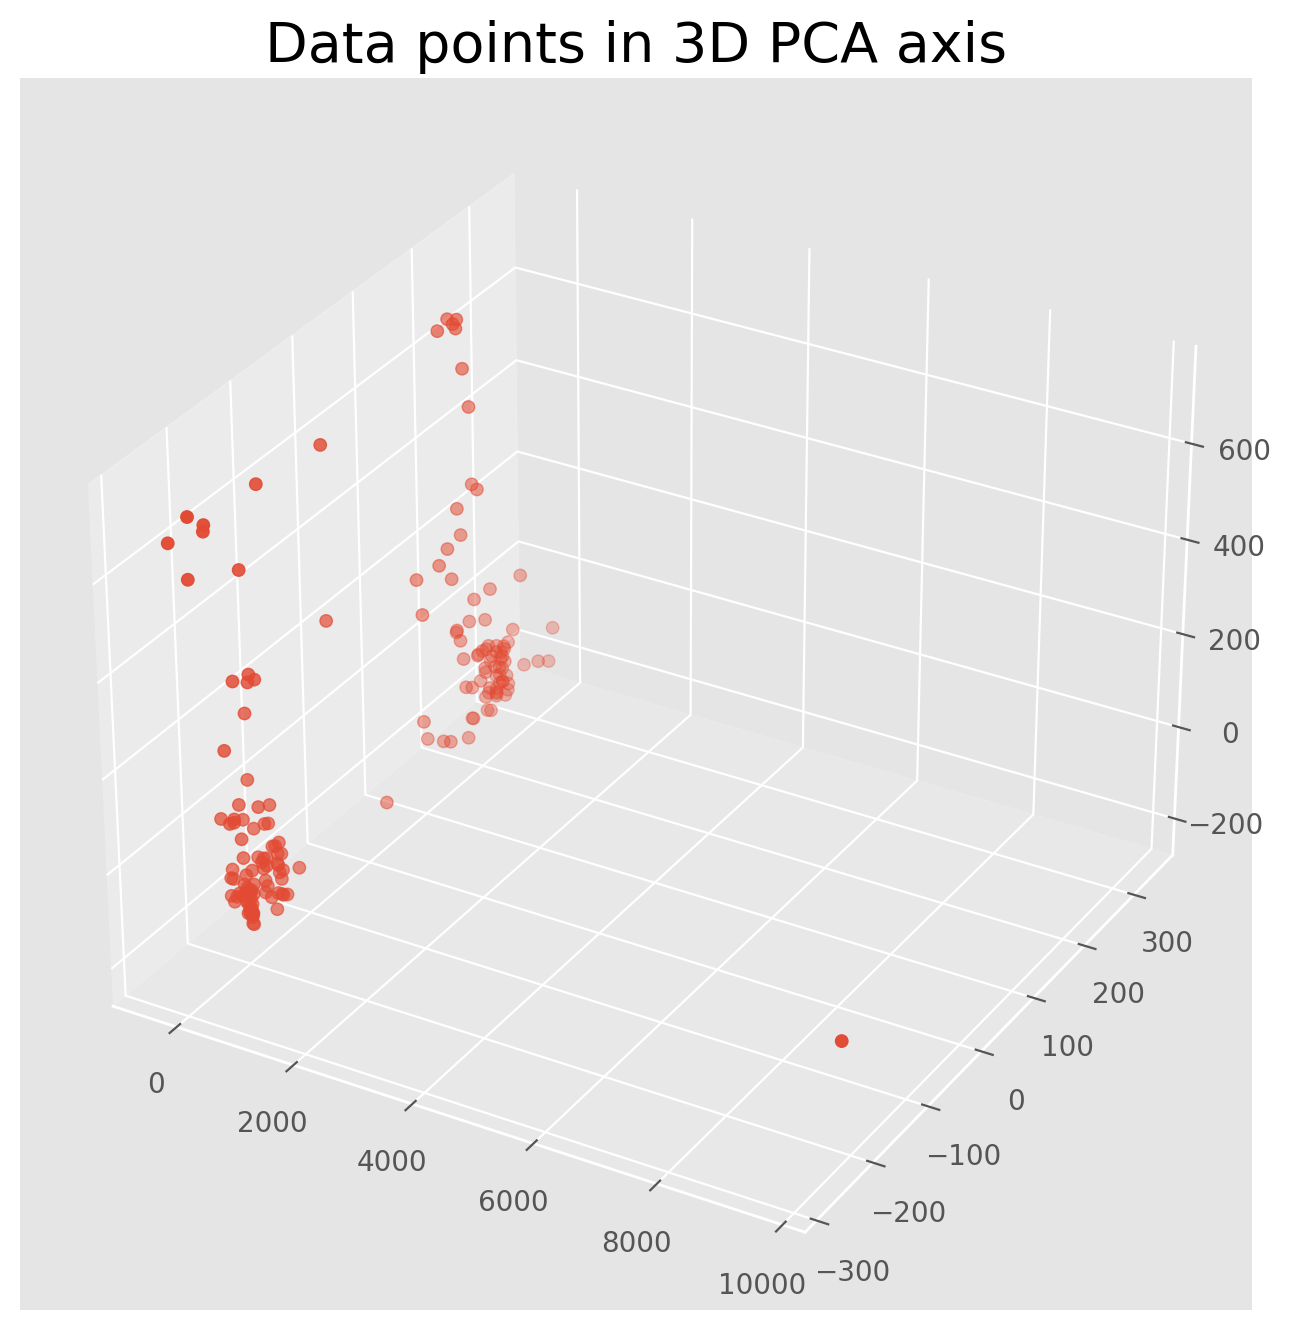

In [39]:
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

plt.rcParams['figure.figsize'] = (16, 8)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Axes3D(fig)
ax.scatter(final_pca_data[0], final_pca_data[2], final_pca_data[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [40]:
clusterer = KMeans(n_clusters=6,random_state=30).fit(final_pca_data)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(final_pca_data)

print(centers)

[[-3.13752053e+02 -6.87606549e+01 -1.59530186e+02 -1.54930621e+01
  -3.37992769e+01 -2.15829414e+00 -7.78782842e+00 -8.56091227e-01
  -2.09788131e-01 -9.26343287e-01 -2.51430311e-02  3.21273155e-01
   2.52849464e-01  5.35530311e-02 -2.50884892e-01 -1.67994747e-01
  -2.00156388e-01  1.37287621e-01  5.32011509e-02 -8.76452415e-02
  -2.22324977e-01 -1.39932873e-02  1.79966867e-03  3.26549822e-02
   5.90239141e-02  1.19033708e-03]
 [ 9.62593768e+03 -8.28269047e+01 -1.76742864e+02 -3.47072327e+00
  -1.97962288e+01 -1.09148364e+00 -3.32857164e+00  3.03179338e-01
   1.13941905e+00 -1.76780686e+00 -1.06872325e-01 -7.69416218e-01
   5.44182254e-01  1.41628179e-01 -1.50801295e-01 -8.05758812e-02
   5.57177974e-02  1.19162836e-01  4.27776853e-02 -1.00086304e-01
  -2.06463354e-01  2.38648700e-02 -4.90496022e-03  1.47547287e-02
   1.59417046e-02 -1.84990399e-02]
 [-2.77196951e+01  1.88568448e+02  1.55087541e+02  1.69809703e+00
   7.26723801e+00 -2.24986835e+00 -1.78228168e-01  8.88820059e-01
   1.6

c:\Users\Playdata\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


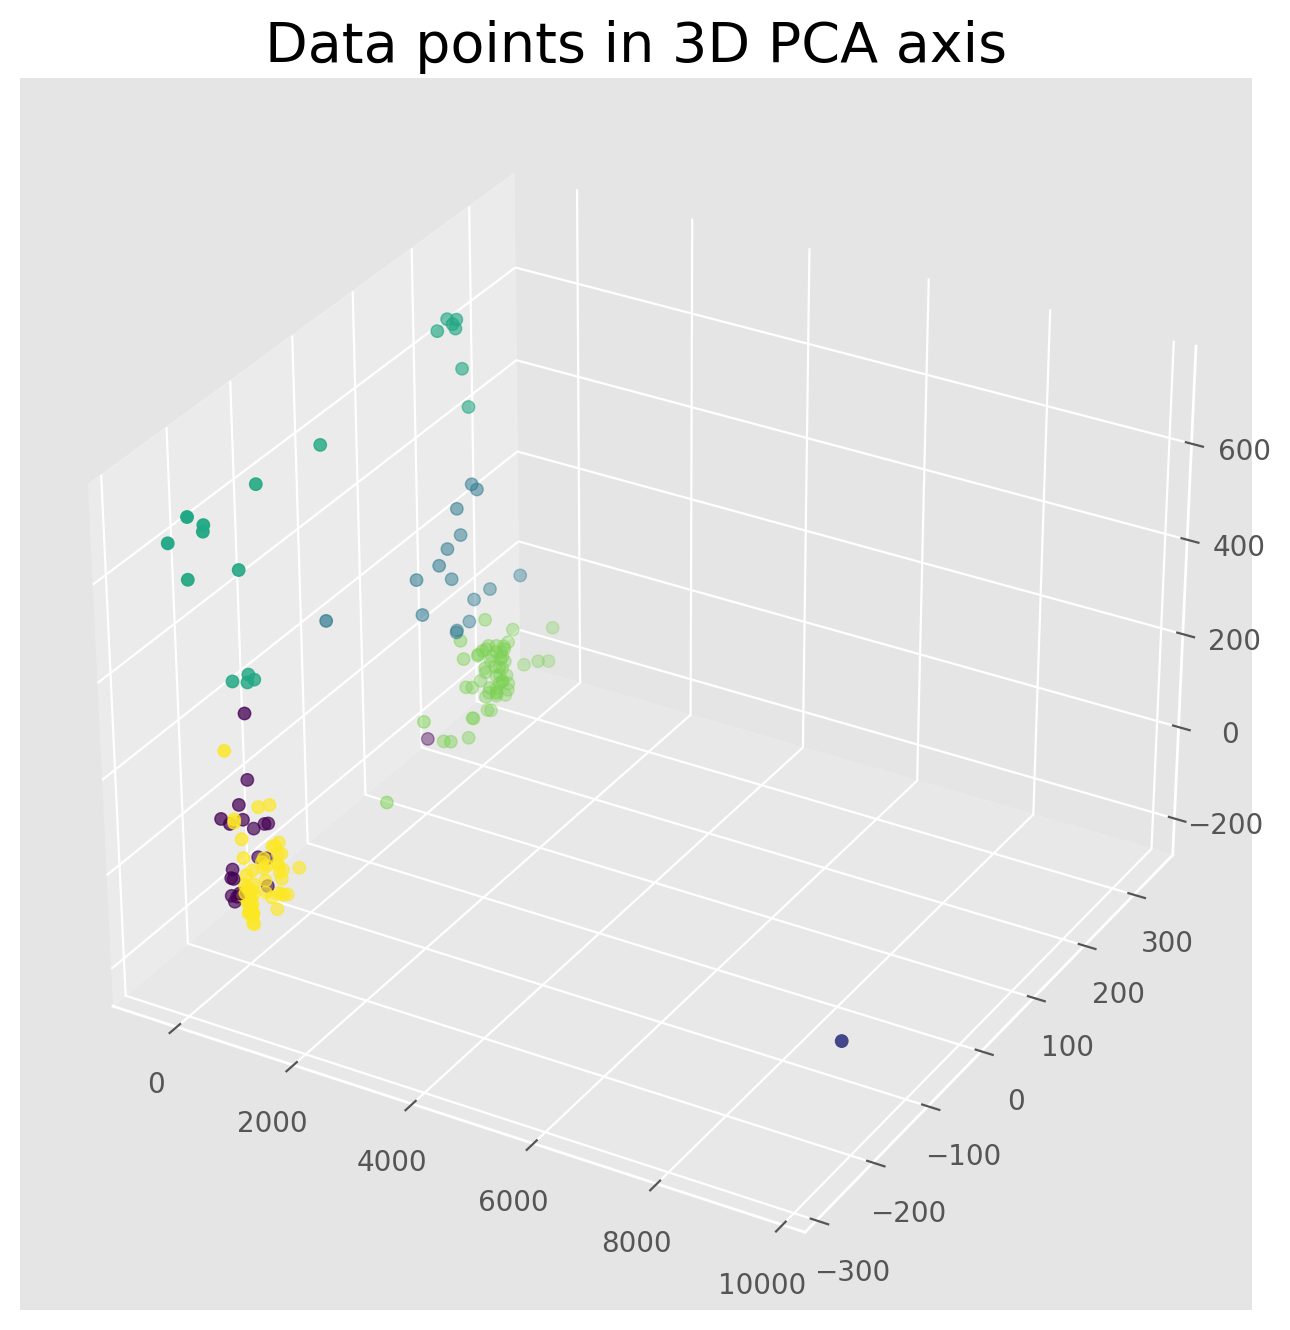

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_pca_data[0], final_pca_data[2], final_pca_data[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

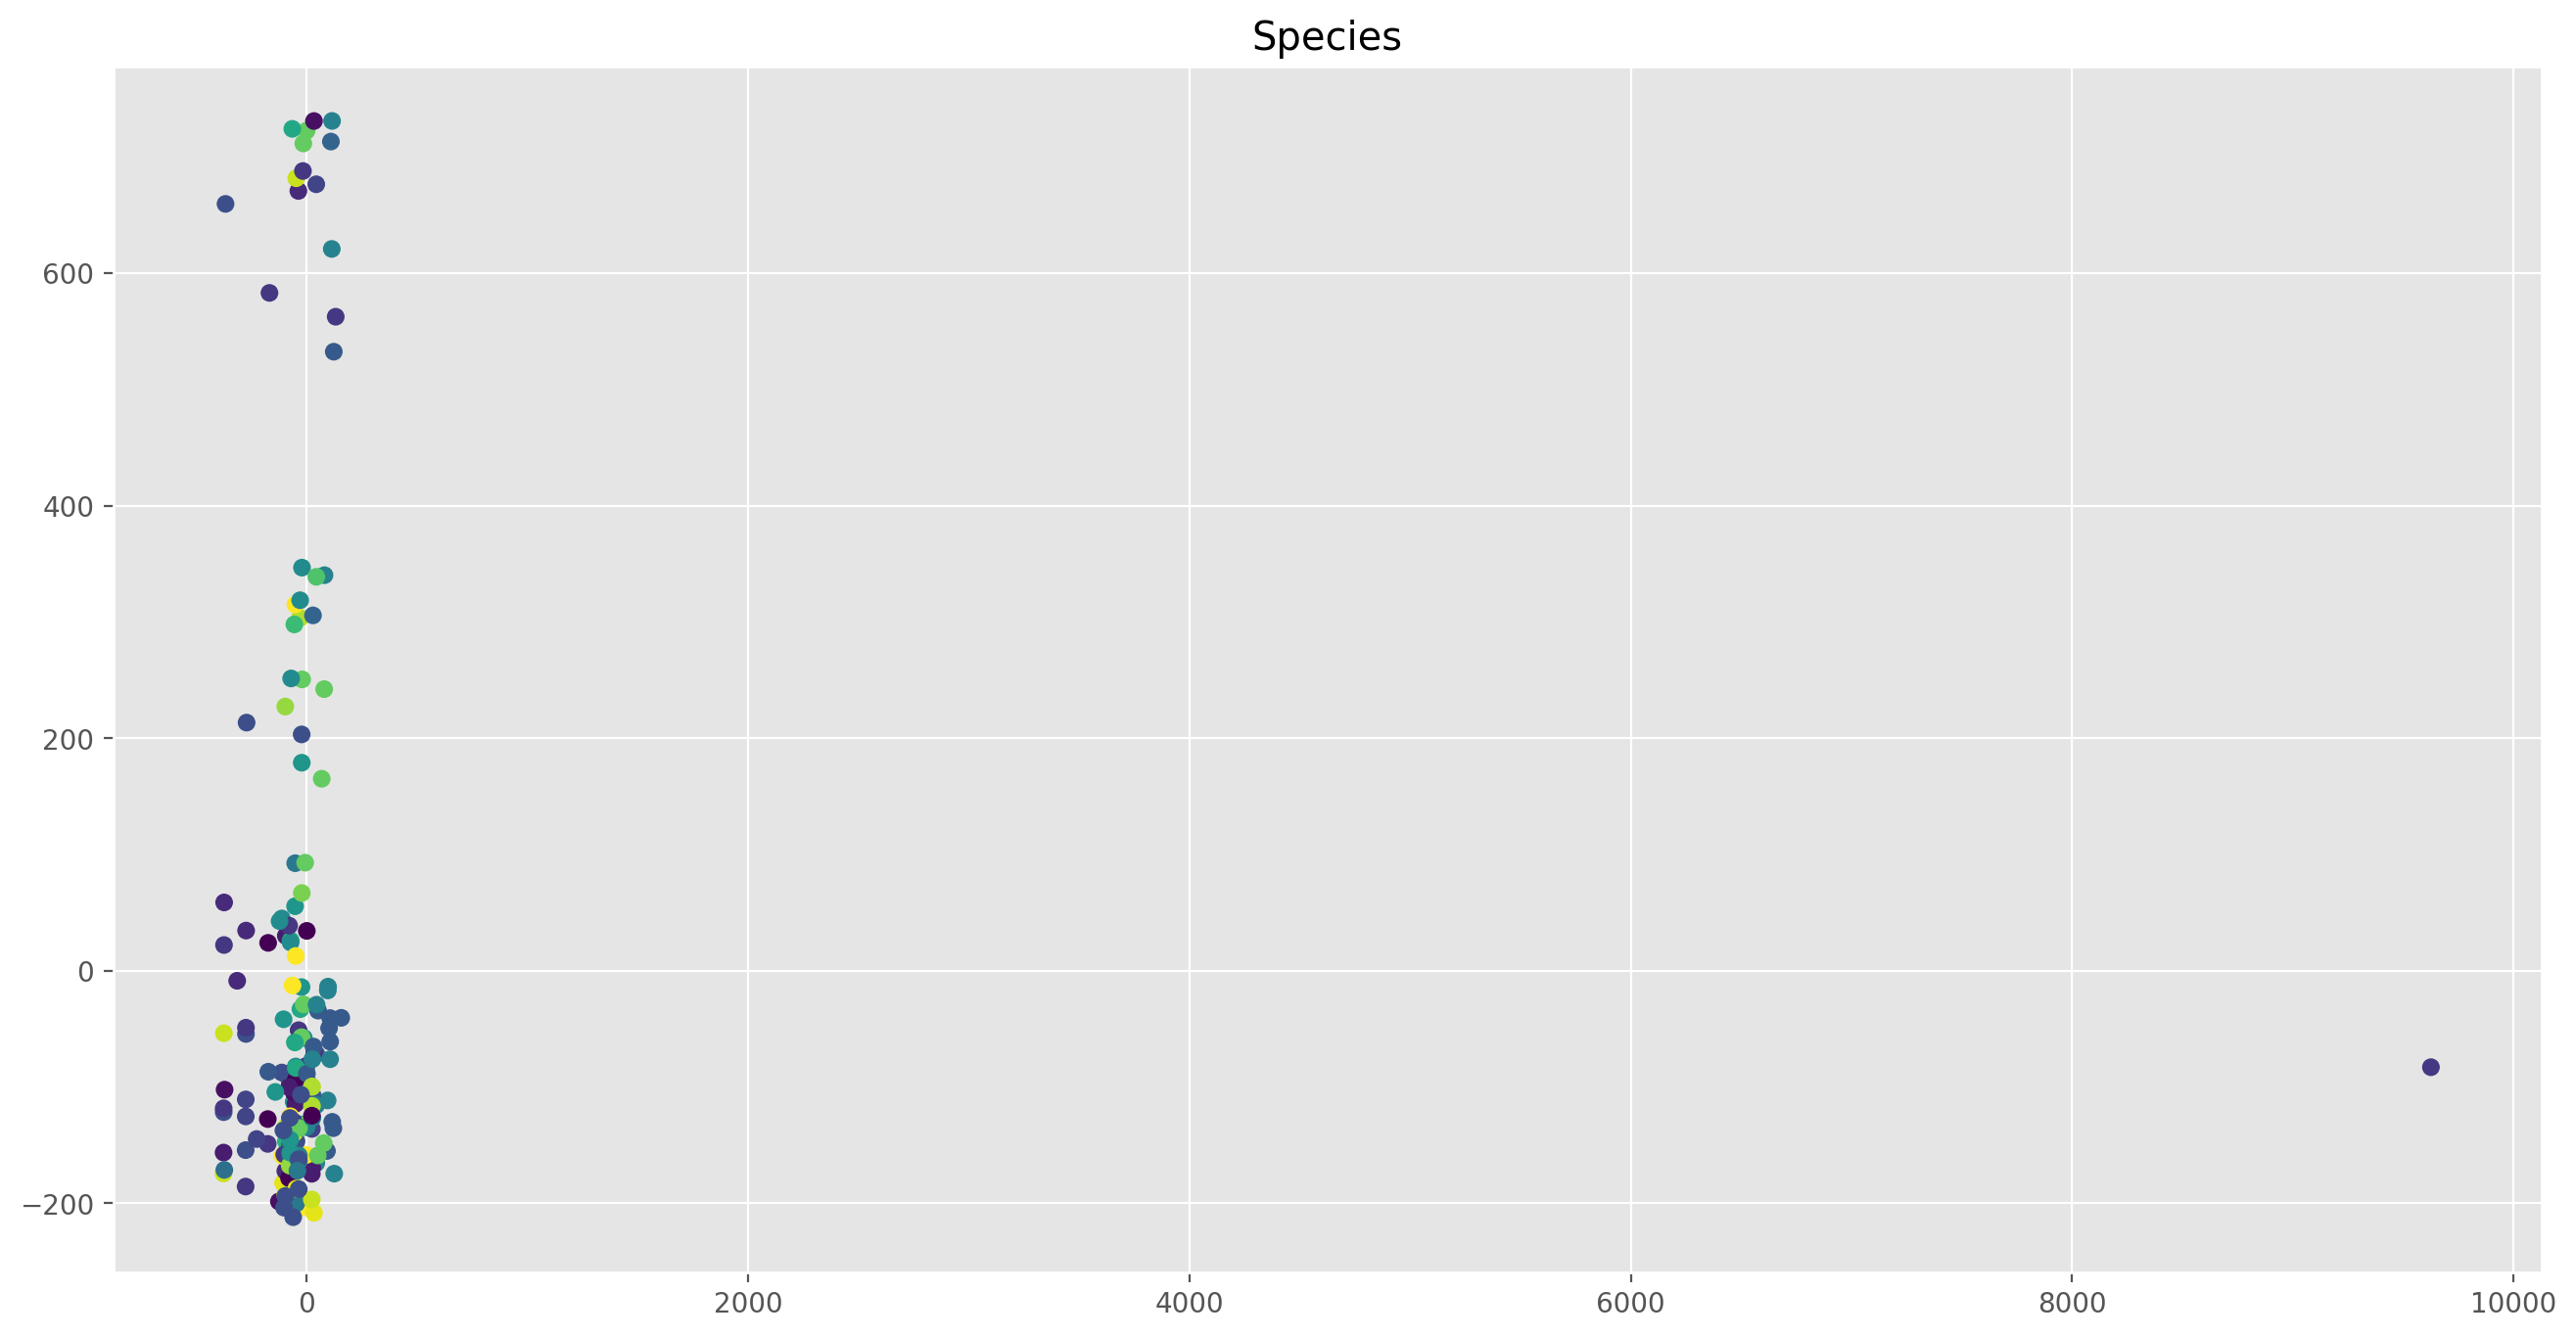

In [43]:
# species(라벨 데이터) 기준 시각화
plt.scatter(x=pca_data['pca1'], y=pca_data['pca2'], c=pca_data['tags'],)
plt.title('Species')
plt.show()

# cluster(kmeans 군집 데이터) 기준 시각화
# plt.scatter(x=cluster_data['pca1'], y=cluster_data['pca2'], c=cluster_data['cluster'])
# plt.title('Cluster')
# plt.show()